In [1]:
import pandas as pd

In [2]:
# Load the datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [5]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
# Add labels
true_df["label"] = 1  # 1 = Real
fake_df["label"] = 0  # 0 = Fake

In [4]:
# Combine datasets
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

In [7]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
# Show shape and preview
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (44898, 5)


,title,text,subject,date,label
0,"LEAKED TAPE Exposes George Soros, Obama GROUP ...",James Proctor has been identified as the ringl...,politics,"Feb 28, 2017",0
1,MI BOARD OF EDUCATION Will Allow Students To C...,Every parent in the United States of America s...,left-news,"Mar 22, 2016",0
2,WATCH: Jake Tapper SHOCKED By Steve Bannon Sa...,"Steve Bannon has a clear, strong agenda for Tr...",News,"January 26, 2017",0
3,Germany's coalition-seeking Greens and liberal...,BERLIN (Reuters) - The two parties that are in...,worldnews,"October 23, 2017",1
4,Donald Trump Complains To Europe That They Ma...,"During the presidential campaign, Donald Trump...",News,"May 27, 2017",0


In [9]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [12]:
# Combine title and text
df["content"] = df["title"] + " " + df["text"]

In [13]:
#text cleaning function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [14]:
def clean_text(text):
    text = text.lower()  # lowercase
    tokens = word_tokenize(text)  # tokenize
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return " ".join(tokens)

In [16]:
# Apply cleaning
df["cleaned"] = df["content"].apply(clean_text)

In [18]:
df[["cleaned", "label"]].head()

,cleaned,label
0,leaked tape expose george soros obama group pl...,0
1,mi board education allow student choose gender...,0
2,watch jake tapper shocked steve bannon saying ...,0
3,germany green liberal find common ground tax b...,1
4,donald trump complains europe make hard get ri...,0


In [19]:
df.to_csv("cleaned_fake_news.csv", index=False)

#  Step 3: Feature Extraction Using TF-IDF

convert it into a numerical format using TF-IDF

In [20]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
# Load cleaned column
X = df["cleaned"]
y = df["label"]

In [23]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [26]:
print(" TF-IDF feature matrix shape:", X_tfidf.shape)
print(" Training samples:", X_train.shape[0])
print(" Test samples:", X_test.shape[0])

 TF-IDF feature matrix shape: (44898, 5000)
 Training samples: 35918
 Test samples: 8980


# Step 4: Train & Evaluate the Model (Logistic Regression)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict
y_pred = model.predict(X_test)

In [29]:
# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.9864142538975501

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4659
           1       0.98      0.99      0.99      4321

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 Confusion Matrix:
 [[4584   75]
 [  47 4274]]


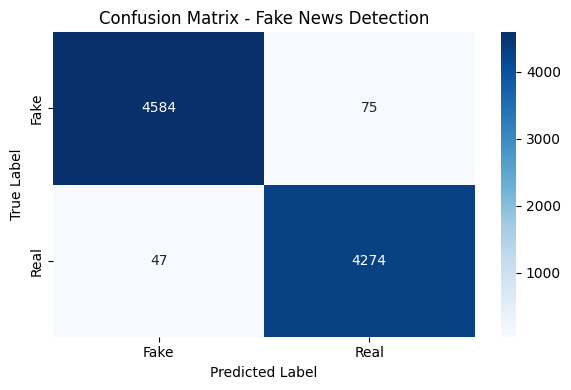

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fake News Detection')
plt.tight_layout()
plt.show()


In [31]:
import pickle

# Save model
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
